# Python Data Mining Quick Start Guide
## Ch 5 - Grouping and Clustering Data
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 

## 클러스터링

### 클러스터링 개념 소개

#### 클러스터링의 목표: 비슷한 것들을 그룹으로 묶어주고 비슷하지 않은 것들은 분리한다.

#### 클러스터링을 위한 수학적 도구를 계량적으로 설명하기 위해서 다음 세 가지가 필요하다.
* 그룹의 위치: 복수의 차원에 걸치는 공간에서 어디에 그룹이 위치할지 결정하는 방법
* 유사성: 다른 데이터와 비교해서 얼마나 유사하고 얼마나 다른지를 결정하는 방법
* 종료 조건: 그룹화를 종료하는 시점

In [1]:
# 필요한 모듈 임포트하기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")

%matplotlib inline

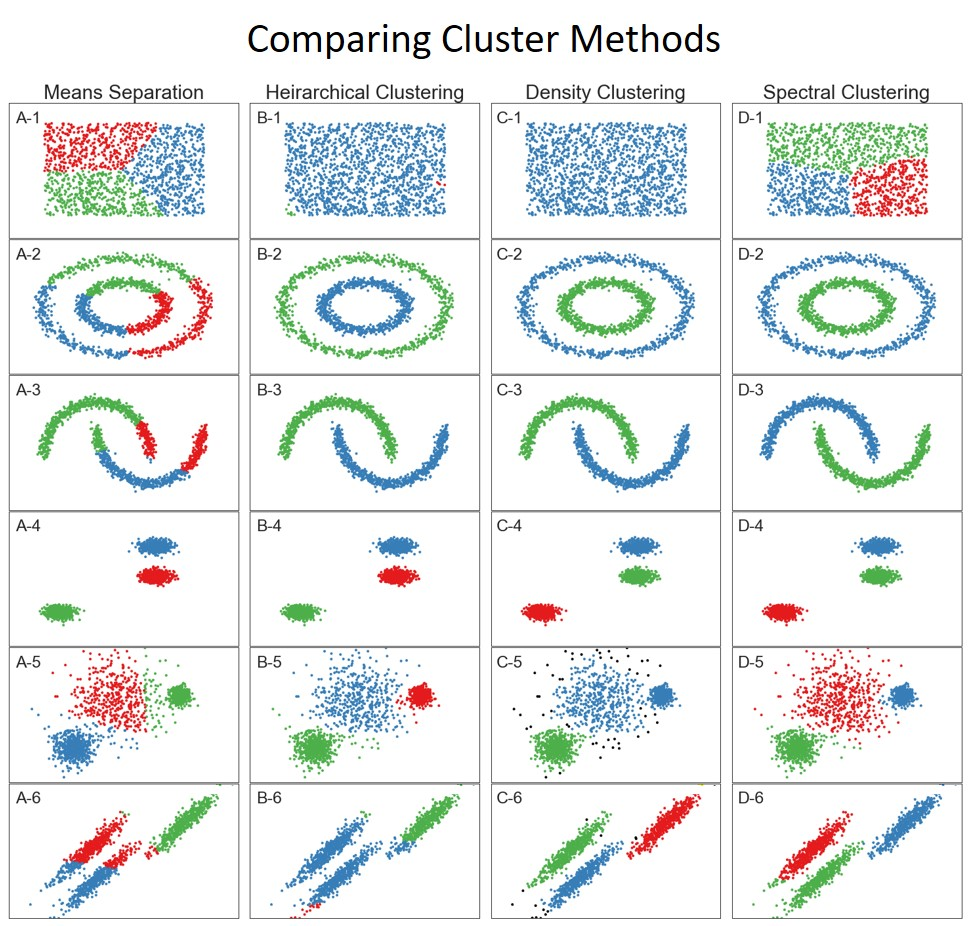

In [2]:
# 클러스터링 기법 비교하기
from IPython.display import Image
Image("compare_clsuter_methods.jpg")

클러스터링의 예에 대한 모의 데이터를 생성하는 함수를 만들어보자.  
이 함수를 호출하고 그 결과를 이 장의 나머지 부분에 나오는 코드를 생성하기 위해 사용할 수 있다.

In [3]:
# Sci-kit learn으로부터 모듈 임포트하기
from sklearn import datasets

In [4]:
blobs = datasets.make_blobs(n_samples=1500,
                            centers=5,
                            cluster_std=[3.0, 0.9, 1.9, 1.9, 1.3],   # cluster의 표준편차    
                            random_state=51)
blobs

(array([[ 11.49229426, -10.23618715],
        [  4.37624526,  -9.15278992],
        [ -2.19367495,   3.21226472],
        ...,
        [ -2.31781126,   4.3968464 ],
        [  0.80917198,   0.95257875],
        [  1.62821554,  -9.52263811]]),
 array([0, 0, 1, ..., 1, 4, 0]))

In [5]:
# 클러스터링 예제를 위한 데이터를 생성하는 함수
def make_blobs():
    # build blobs for demonstration
    n_samples = 1500
    blobs = datasets.make_blobs(n_samples=n_samples,
                                 centers=5,
                                 cluster_std=[3.0, 0.9, 1.9, 1.9, 1.3],   # cluster의 표준편차    
                                 random_state=51)
    
    # create a Pandas dataframe for the data
    df = pd.DataFrame(blobs[0], columns=['Feature_1', 'Feature_2'])
    df.index.name = 'record'
    return df

df = make_blobs()
df.head()

,Feature_1,Feature_2
record,,
0,11.492294,-10.236187
1,4.376245,-9.152790
2,-2.193675,3.212265
3,-2.976039,3.037043
4,-2.963703,2.336960


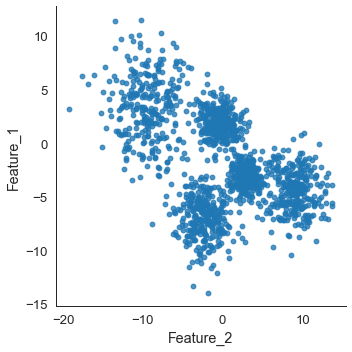

In [6]:
# 방울 데이터의 산점도 그리기
sns.lmplot(x='Feature_2', y='Feature_1', 
           data=df, fit_reg=False)        # fit_reg=False: 회귀직선을 그리지 않음

## 평균 분리(Means Separation)
* 클러스터링을 위한 한 가지 방법은 센트로이드에 따라 그룹을 나누고 수렴할 때까지 데이터 포인트들을 이동하는 것이다.
* 이 기법을 사용하기 위해서는 클러스터의 숫자(k)를 미리 알아야 한다.
* 즉, 알고리즘에 클러스터를 몇 개로 할 것인지 지정해줘야 한다.

### K-means
#### '평균 분리'의 기본 기법은 'k-평균 클러스터링'이라고 부르며, 데이터마이닝에서 가장 간단하고 널리 사용되는 기법이다.
#### 이 기법의 변종 및 개량종들은 점점 많아지고 있지만, 핵심적으로는 다음의 네 단계다.
1. 입력 데이터 포인트에서 랜덤으로 k개의 초기 클러스터 중심을 고른다.
2. 모든 데이터 포인트를 가장 가까운 클러스터에 할당한다.
3. k개의 센트로이드를 새롭게 생성된 클러스터 안의 중심으로 이동시킨다.
4. k개의 클러스터가 더 이상 향상되지 않을 때까지(즉, 수렴할 때까지) 반복한다.
#### 이 기법은 '위치'를 정의하기 위해 '센트로이드'를 사용하고, '유클리디안 거리'를 '유사성' 지표로 사용하고, '응집'을 '품질 점수'로 사용한다.
#### 종료는 품질 점수가 수렴할 때, 즉, 변화가 허용오차(tolerance) 이내로 측정될 때 일어난다.

#### 실루엣 계수: https://studying-haeung.tistory.com/10

* k-평균 클러스터 객체를 초기화할 때는 허용오차를 tol 옵션을 사용하여 설정할 수 있다.
* 많은 횟수의 적합 수행에도 허용오차에 도달하지 않으면 max_iter를 사용해서 강제 종료할 수 있다.

In [7]:
# 방울 예제 데이터 생성
df = make_blobs()

# 모듈을 임포트하고, K-평균 객체 생성하기
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=5, tol=0.004, max_iter=300)

# 입력 데이터에 모형을 적합시키기
clus.fit(df)

# 입력 데이터 클러스터를 할당하고, 처음 다섯 개 레이블 출력하기
df['K-means Cluster Labels'] = clus.labels_
print(df['K-means Cluster Labels'][:5].tolist())

df.head()

C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


[3, 3, 4, 4, 4]


,Feature_1,Feature_2,K-means Cluster Labels
record,,,
0,11.492294,-10.236187,3
1,4.376245,-9.152790,3
2,-2.193675,3.212265,4
3,-2.976039,3.037043,4
4,-2.963703,2.336960,4


이제 클러스터 레이블이 표시된 그룹를 시각화하기 위해 seaborn의 산점도를 그려보자.

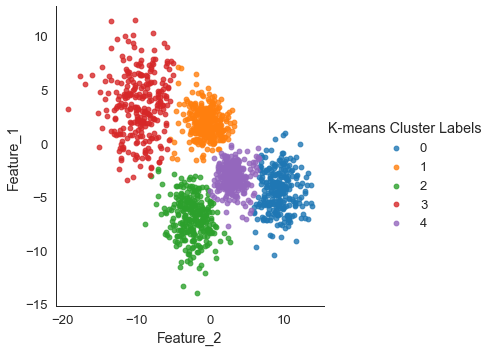

In [8]:
sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="K-means Cluster Labels", data=df, fit_reg=False)

### k 값 찾기
* 많은 데이터마이닝 문제에서 k값은 알려져 있지 않다.  
* k값을 찾는 가장 흔한 방법은 적절한 품질점수를 선택하고 (문제에 잘 맞는) 가장 좋은 점수를 찾기 위해 k의 다른 값들을 적합해 보는 것이다.
* 기본으로 '실루엣 점수'가 자주 사용된다.  
* k값을 찾는 코드를 살펴보자.

In [9]:
# 방울 예제 데이터 생성하기
df = make_blobs()

# 실루엣 점수(silhouette score)를 사용해서 최상의 k 값 고르기
# metrics 모듈 임포트하기
from sklearn import metrics

# 테스트를 위해 k 값의 리스트를 생성하고 for loop 사용하기
n_clusters = [2,3,4,5,6,7,8]
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    cluster_labels = kmeans.predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(k, S))

C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


n_clusters = 2, silhouette score 0.442473


C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


n_clusters = 3, silhouette score 0.442798


C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


n_clusters = 4, silhouette score 0.513624


C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


n_clusters = 5, silhouette score 0.547875


C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


n_clusters = 6, silhouette score 0.524818


C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


n_clusters = 7, silhouette score 0.523139


C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


n_clusters = 8, silhouette score 0.486676


* 여기서 k=5가 가장 좋은 선택으로 보인다. 이것은 데이터가 원래 다섯 개의 부분으로 돼 있었으므로 말이 된다. 실루엣 점수는 K-평균 알고리즘이 선택된 다섯 개의 클러스터와 적합될 때 가장 높다는 것을 확인할 수 있다.

### K-means++
#### K-평균의 첫 단계는 클러스터 중심을 램덤으로 선택하는 것이다.
1. 입력 데이터 포인트에서 랜덤으로 k개의 초기 클러스터 중심을 고른다.
2. 모든 데이터 포인트를 가장 가까운 클러스터에 할당한다.
3. k개의 센트로이드를 새롭게 생성된 클러스터 안의 중심으로 이동시킨다.
4. k개의 클러스터가 더 이상 향상되지 않을 때까지(즉, 수렴할 때까지) 반복한다.  

#### 이 단계의 '랜덤' 부분은 특히 방대한 데이터의 경우 긴 적합시간을 유발할 수 있다.  
#### 추가적으로, K-평균 알고리즘은 완전히 확정적이지 않고 글로벌 최소값 대신에 로컬 최소값에 수렴할 가능성도 있다.
#### 랜덤 초기화 전략의 이 두 가지 단점은 K-평균++ 기법을 개발하는 동기가 되었다.
* 이 기법은 초기 클러스터 중심을 선택하는 좀 더 효율적인 방법을 제공한다.
* 효율적인 클러스터 초기화 전략을 제외하면 나머지 적합 단계들은 동일하다.
* K-평균++ 전략은 클러스터들이 멀리 떨어져 있다는 가정 하에 초기 클러스터 중심을 멀리 떨어져 있게 만든다  
  (클러스터 내의 데이터 포인트들은 서로 가깝게 하면서)  
  
#### scikit-learn은 KMeans 옵션을 통해 K-평균++를 사용하기 쉽게 한다. init = 'k-means++'를 전달하고 아래 코드처럼 수행할 수 있다.

In [10]:
# k-평균++ init 기법을 사용해서 k-평균 객체를 초기화하기
clus = KMeans(n_clusters=5, init='k-means++',
              tol=0.004, max_iter=300)

### 미니 배치 K-평균(Mini Batch K-means)
#### 기본 K-평균 기법은 모든 적합 반복에서 모든 데이터를 사용하므로, 방대한 데이터의 경우 상당한 양의 컴퓨팅 자원을 사용하게 되고 오래 걸린다.
#### 이 문제를 해결하는 방법은 랜덤으로 선택된 작은 배치(batch)들을 적합시키고 각 반복마다 새로운 미니 배치를 선택해 수렴할 때까지 수행하는 것이다.
* 이 방법은 적합 시간을 상당히 단축시킬 수 있지만, 글로벌 최소값이 아닌 로컬 최소값에 수렴할 위험도 있다는 것을 명심하라.
* 다음 코드는 scikit-learn에서 batch_size 옵션을 사용해 K-평균의 배치 버전을 수행하는 법을 보여준다.

In [11]:
# 모듈을 임포트하고, k-평균 미니 객체를 초기화하기
from sklearn.cluster import MiniBatchKMeans
clus = MiniBatchKMeans(n_clusters=5, batch_size=50,
                        tol=0.004, max_iter=300)

## 계층적 클러스터링(Hierarchical Clustering)
#### 계층적 클러스터링의 목표: 계층적인 방법으로 비슷한 클러스터를 합치는 것
#### 클러스터의 수는 어느 정도 수준의 계층이 문제에 적당하지에 따라 달라진다.
#### 계층적인 방법으로 연결된 클러스터의 그림은 '덴드로그램(dendrogram)'이라 불린다.
* 덴드로그램은 거리 지표(y축)와 데이터 포인트 기록(x축)으로 이루어진다.
* 그룹은 계층적으로 연결된 그래프에서 이루어지므로, 클러스터의 수는 y축에 따라 위아래로 선택된다.

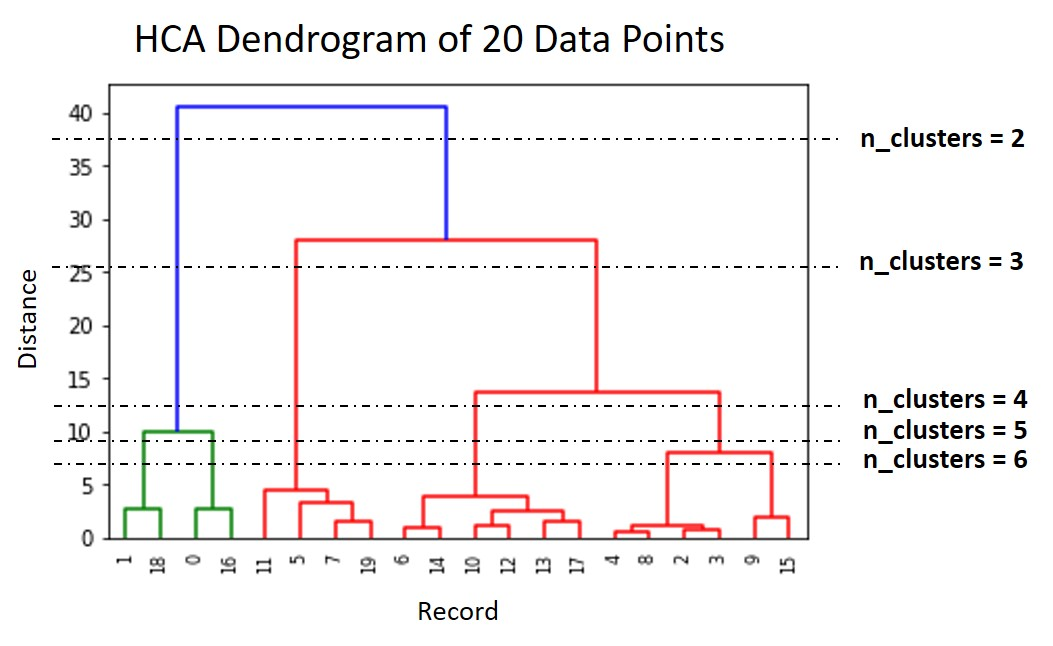

In [12]:
from IPython.display import Image
Image("hca_dendrogram.jpg")

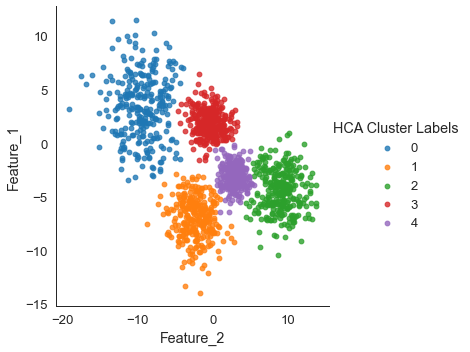

In [13]:
# 방울 예제 데이터 생성하기
df = make_blobs()

# 모듈을 임포트하고, HCA 객체를 초기화하기
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=5, 
                               affinity='euclidean', linkage='ward')

# 입력 데이터에 모형을 적합시키기
clus.fit(df)

# 클러스터 할당하기
df['HCA Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="HCA Cluster Labels", data=df, fit_reg=False)

In [14]:
# 실루엣 점수(silhouette score)를 사용하여 최적 클러스터의 수를 찾기
# metrics 모듈 임포트하기
from sklearn import metrics

# 방울 예제 데이터 생성하기
df = make_blobs()

# 모듈을 임포트하고, HCA 객체를 초기화하기
from sklearn.cluster import AgglomerativeClustering

# 테스트할 k 값의 리스트를 생성하고 for loop를 사용하기
n_clusters = [2,3,4,5,6,7,8]
for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters=num, 
                                  affinity='euclidean', linkage='ward',
                                  memory='./model_storage/dendrogram', 
                                  compute_full_tree=True)
    cluster_labels= HCA.fit_predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(num, S))

n_clusters = 2, silhouette score 0.491869
n_clusters = 3, silhouette score 0.445017
n_clusters = 4, silhouette score 0.514050
n_clusters = 5, silhouette score 0.540089
n_clusters = 6, silhouette score 0.512037
n_clusters = 7, silhouette score 0.506730
n_clusters = 8, silhouette score 0.476728


#### AgglomerativeClustering(linkage=?)
* ward (default): 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합친다. 그래서 크기가 비교적 비슷한 클러스터가 만들어진다.
* average: 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합친다.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [70.0, 70.0, 106.25, 106.25],
  [55.0, 55.0, 88.125, 88.125],
  [32.5, 32.5, 71.5625, 71.5625],
  [10.0, 10.0, 52.03125, 52.03125],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [143.75, 143.75, 184.375, 184.375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [164.0625, 164.0625, 234.375, 234.375],
  [31.015625, 31.015625, 199.21875, 199.21875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

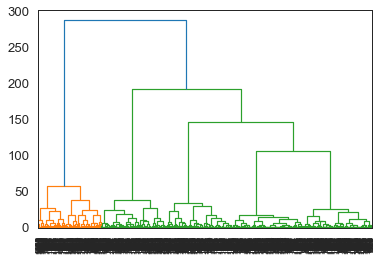

In [15]:
# scipy 모듈 임포트하기
from scipy.cluster import hierarchy

# 각 샘플 사이의 거리 계산하기
Z = hierarchy.linkage(df, 'ward') 
 
# 커스텀 나뭇잎 그림 그리기
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

## 밀도 클러스터링(Density Clustering)
#### '유사성'을 데이터 포인트 사이의 유일한 거리 지표로 삼는 대신
#### 밀도 클러스터링은 이 포인트에 의해 커버되는 공간을 추가 지표로 삼는다.
* 밀도 클러스터링에서는 주어진 공간에서 포인트의 개수를 사용한다.
* 그 결과로, 밀도 클러스터링은 잡음을 제거하는 데 효과적이다.
* 즉, 데이터의 밀집도가 높은 영역 밖의 이상치를 제거하기 쉽다.  

#### 밀도 클러스터링은 적합 루틴을 수행하기 전에 클러스트의 개수를 정할 필요가 없다.
#### 가장 인기있는 밀도 클러스터링 알고리즘은 'DBSCAN'이고,  
#### 클러스터 안에서 데이터 포인트만 포함하도록 밀도의 정의를 제한하기 위해 '응집' 개념을 사용한다. <--- 포인트의 로컬 밀도  

* 유사성 지표로 '유클리디안 거리'가 사용된다.
* 밀도 지표로 '클러스터 내 포인트의 수를 클러스터의 반지름으로 나눈 것'이 사용된다.  
  더 나은 스케일링을 위해 '입실론'의 제곱이나 세제곱이 사용될 수도 있다.

#### DBSCAN의 적합 루틴
* DBSCAN : 밀도 기반 클러스터링

##### '입실론'의 값을 정의한다.
##### 이웃으로서 '입실론'에 의해 커버될 공간을 고려한다.
##### 잡음이 고려되지 않게 하기 위해, 같은 이웃에 위치하게 될 최소의 다른 데이터 포인트의 수(min_samples)를 정한다.
##### 이 알고리즘은 이러한 입력을 이용해 다음의 레이블로 각 데이터 포인트를 할당한다.
* 코어 포인트: 이웃 안에 min_samples 이상 있는 경우
* 경계 포인트: min_samples 요구사항에는 미치지 못하지만, 코어 포인트의 이웃에 있는 겨우
* 잡음 포인트: 코어 포인트 혹은 경계 포인트가 아닌 경우

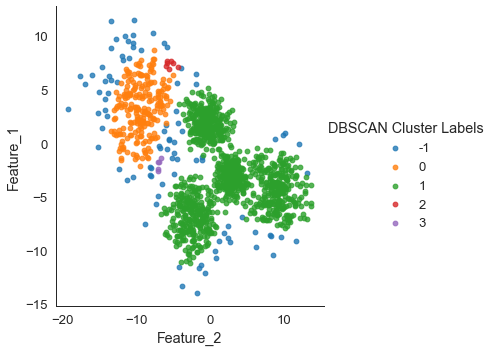

In [16]:
# 방울 예제 데이터 생성하기
df = make_blobs()

# 모듈을 임포트하고, DBSCAN 객체를 초기화하기
from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')

# 입력 데이터셋에 모형을 적합시키기
clus.fit(df)

# 레이블 정보만 가져와서 클러스트로 할당하기
df['DBSCAN Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="DBSCAN Cluster Labels", data=df, fit_reg=False)

In [17]:
from sklearn.datasets import make_circles, make_moons
from sklearn.cluster import DBSCAN

In [18]:
n_samples = 1000
np.random.seed(2)
X1, y1 = make_circles(n_samples=n_samples, factor=.5, noise=.09)
X2, y2 = make_moons(n_samples=n_samples, noise=.1)

In [19]:
def plot_DBSCAN(title, X, eps, xlim, ylim):
    model = DBSCAN(eps=eps)
    y_pred = model.fit_predict(X)
    idx_outlier = model.labels_ == -1
    plt.scatter(X[idx_outlier, 0], X[idx_outlier, 1], marker='x', lw=1, s=20)
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='o', facecolor='g', s=5)
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='s', facecolor='y', s=5)
    X_core = X[model.core_sample_indices_, :]
    idx_core_0 = np.array(list(set(np.where(model.labels_ == 0)[0]).intersection(model.core_sample_indices_)))
    idx_core_1 = np.array(list(set(np.where(model.labels_ == 1)[0]).intersection(model.core_sample_indices_)))
    plt.scatter(X[idx_core_0, 0], X[idx_core_0, 1], marker='o', facecolor='g', s=80, alpha=0.3)
    plt.scatter(X[idx_core_1, 0], X[idx_core_1, 1], marker='s', facecolor='y', s=80, alpha=0.3)
    plt.grid(False)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)
    return y_pred

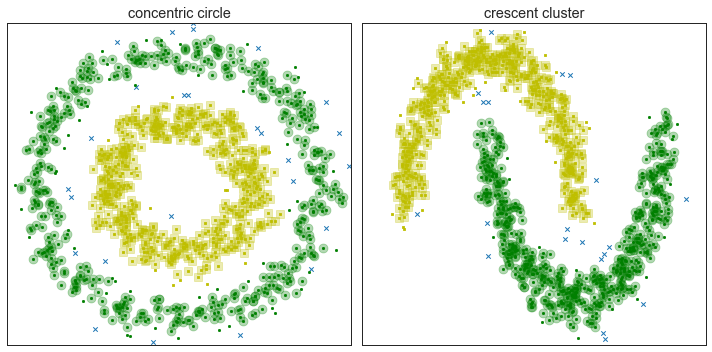

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
y_pred1 = plot_DBSCAN("concentric circle", X1, 0.1, (-1.2, 1.2), (-1.2, 1.2)) # Epsilon(반경)을 0.1로 주고 xlim과 ylim 동일하게 설정
plt.subplot(122)
y_pred2 = plot_DBSCAN("crescent cluster", X2, 0.1, (-1.5, 2.5), (-0.8, 1.2))
plt.tight_layout()
plt.show()

## 스펙트럼 클러스터링(Spectral Clustering)
스펙트럼 클러스터링은 클러스터를 구성하는 노드의 연결성에 기반해서 연결 그래프를 생성하고 데이터 포인트를 그룹화한다. -> 그래프 기반 클러스터링

밀도 클러스터링과 달리, 적합 과정에서 클러스터의 수를 알아야 한다.(단점)
-> decomposition할 때 많이 나온다

* spectral : 특성을 eigenvalue, eigenvector 등으로 나눈 것
* graph : 점과 선으로 연결된 그림 (닫힌 그래프, 개방형 그래프) -> 그래프는 굉장히 유연하다
* edge가 있다 -> 둘은 관계가 있다 / edge가 여러 개다 -> edge가 1개인 경우보다 더 관계가 있다 (가중치가 다름)
* 하나의 노드 edge 몇 개를 가지는가? -> 그 노드가 얼마나 영향력을 갖고 있는지를 알려준다
* 즉, 그래프적으로 접근할 때는 데이터 포인트가 얼마나 가까운지보다 그들끼리 어떻게, 얼마나 많이 연결되어 있는지가 중요하다.
* minimum cut : 그렇게 잘랐을 때 정보 손실량이 가장적다 / optimal cut : 그렇게 잘랐을 때 결과가 최적이다

C:\Users\jy990\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


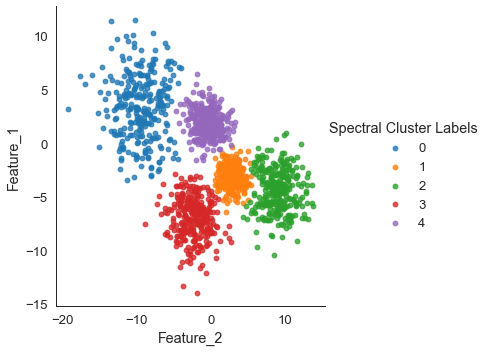

In [21]:
# 방울 예제 데이터 생성하기
df = make_blobs()

# 모듈을 임포트하고, 스펙트럼 클러스터링 객체를 초기화하기
from sklearn.cluster import SpectralClustering
clus = SpectralClustering(n_clusters=5, random_state=42, 
                          assign_labels='kmeans', n_init=10,
                          affinity='nearest_neighbors', n_neighbors=10)

# 입력 데이터에 모델 적합시키기
clus.fit(df)

# 클러스터 할당하기
df['Spectral Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="Spectral Cluster Labels", data=df, fit_reg=False)

* 성능이 제일 좋네